# Milestone 1 Phase 2

## Introduction

Nama    : Fitri Octaviani

Batch   : HCK 006

## Problem Statement

Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.

# Latar Belakang

Dalam dunia bisnis yang penuh persaingan, menjaga pelanggan yang sudah ada menjadi hal yang sangat penting. Akan tetapi, banyak perusahaan menghadapi tantangan "churn," yakni saat pelanggan berhenti menggunakan produk atau layanan perusahaan. Churn ini bisa menjadi masalah serius karena ketika perusahaan kehilangan pelanggan, berarti pendapatan berkurang, dan biaya untuk mencari pelanggan baru lebih tinggi dibandingkan dengan mempertahankan pelanggan yang sudah ada.

Untuk menghadapi masalah churn tersebut, perusahaan memerlukan analisis data dan machine learning. Dengan menggunakan data historis pelanggan berdasarkan membership category, perusahaan dapat membangun model prediksi churn untuk mengidentifikasi pelanggan yang berisiko tinggi untuk churn. Dengan begitu, perusahaan dapat mengambil tindakan pencegahan yang tepat, meningkatkan retensi pelanggan, dan secara keseluruhan meningkatkan kinerja bisnis mereka.

## About the Data

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

# Import Library

In [1]:
# library yang dibutuhkan
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import joblib


In [2]:
np.random.seed(50)
tf.random.set_seed(50)

# Data Loading

In [3]:
# read data train & data test
df = pd.read_csv('churn.csv')

In [4]:
# set max display column
pd.options.display.max_columns = 99

In [5]:
# menampilkan data teratas
df.head(10)


,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [6]:
# menampilkan data terbawah
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


Dataset terdiri dari kolom numerikal dan kategorikal

In [7]:
# melihat shape dataframe
df.shape

(37010, 22)

Dalam dataset terdapat 37010 baris dan 22 kolom

In [8]:
# melihat kolom-kolom dataframe
df.columns

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [9]:
# melihat list kolom yang memiliki nilai sebagai kategori
cat_cols = list(df.select_dtypes(include='object'))
cat_cols

['user_id',
 'gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [10]:
# numerical overview
for i in cat_cols:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  user_id
Total unique labels:  36992
------------------------------
Column:  gender
Total unique labels:  2
------------------------------
Column:  region_category
Total unique labels:  3
------------------------------
Column:  membership_category
Total unique labels:  6
------------------------------
Column:  joining_date
Total unique labels:  1096
------------------------------
Column:  joined_through_referral
Total unique labels:  2
------------------------------
Column:  preferred_offer_types
Total unique labels:  3
------------------------------
Column:  medium_of_operation
Total unique labels:  3
------------------------------
Column:  internet_option
Total unique labels:  3
------------------------------
Column:  last_visit_time
Total unique labels:  30101
------------------------------
Column:  used_special_discount
Total unique labels:  2
------------------------------
Column:  offer_application_preference
Total unique labels:  2
------------------------------
Column: 

In [11]:
# melihat list kolom yang memiliki nilai sebagai numerikal
num_cols = df.describe().columns.tolist()
num_cols

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'churn_risk_score']

In [12]:
# numerical overview
for i in num_cols:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  age
Total unique labels:  55
------------------------------
Column:  days_since_last_login
Total unique labels:  27
------------------------------
Column:  avg_time_spent
Total unique labels:  24243
------------------------------
Column:  avg_transaction_value
Total unique labels:  36894
------------------------------
Column:  avg_frequency_login_days
Total unique labels:  971
------------------------------
Column:  points_in_wallet
Total unique labels:  23564
------------------------------
Column:  churn_risk_score
Total unique labels:  2
------------------------------


In [13]:
# melihat type data dari masing-masing kolom
df.dtypes

user_id                          object
age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

# Exploratory Data Analysis

Drop kolom user_id karena saat melakukan klasifikasi machine learning, kolom ini berisi informasi yang tidak relevan.

In [14]:
# drop kolom user_id
df = df.drop('user_id', axis=1)

## **``Convert date and time``**

Month dapat menjadi input untuk artificial neural network (ann). Namun saya perlu mengonversi kolom joining_date dan last_visit_month menjadi representasi numerik yang dapat dipahami dan diproses oleh ANN.

Salah satu cara umum untuk melakukannya adalah dengan mengonversi month menjadi nilai numerik yang mewakili titik refwrensi tetap.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           37010 non-null  int64  
 1   gender                        36951 non-null  object 
 2   region_category               31579 non-null  object 
 3   membership_category           37010 non-null  object 
 4   joining_date                  37010 non-null  object 
 5   joined_through_referral       31568 non-null  object 
 6   preferred_offer_types         36722 non-null  object 
 7   medium_of_operation           31615 non-null  object 
 8   internet_option               37010 non-null  object 
 9   last_visit_time               37010 non-null  object 
 10  days_since_last_login         37010 non-null  int64  
 11  avg_time_spent                37010 non-null  float64
 12  avg_transaction_value         37010 non-null  float64
 13  a

In [16]:
# Mengubah bentuk data menjadi Datetime untuk kolom date
df['joining_date']=pd.to_datetime(df['joining_date'])
df['last_visit_time']=pd.to_datetime(df['last_visit_time'])

In [17]:
# convert ke representasi berdasarkan month
df['joining_month'] = pd.DatetimeIndex(df['joining_date']).month
df['last_visit_month'] = pd.DatetimeIndex(df['last_visit_time']).month

In [18]:
df.joining_month.value_counts()

12    3194
7     3188
1     3159
8     3148
10    3097
4     3081
6     3079
3     3070
9     3065
5     3062
11    3023
2     2844
Name: joining_month, dtype: int64

In [19]:
df.last_visit_month.value_counts()

7    37010
Name: last_visit_month, dtype: int64

Dikarenakan kolom last_visit_month hanya memiliki 1 unique, maka kolom tersebut di drop.

Dan karena kolom joining_date dan last_visit_time sudah di convert ke bentuk month, sehingga kedua kolom tersebut saya drop.

In [20]:
# drop kolom joining_date dan last_visit_time
df = df.drop(['joining_date', 'last_visit_time'], axis=1)

In [21]:
# drop kolom last_visit_month
df = df.drop('last_visit_month', axis=1)

In [22]:
df

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_month
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,4
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,3
2,26,F,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,2
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1,12
4,64,M,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,36,M,Town,Gold Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0,3
37006,27,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0,1
37007,20,M,NaN,Gold Membership,Yes,Without Offers,NaN,Mobile_Data,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0,7
37008,38,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0,5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           37010 non-null  int64  
 1   gender                        36951 non-null  object 
 2   region_category               31579 non-null  object 
 3   membership_category           37010 non-null  object 
 4   joined_through_referral       31568 non-null  object 
 5   preferred_offer_types         36722 non-null  object 
 6   medium_of_operation           31615 non-null  object 
 7   internet_option               37010 non-null  object 
 8   days_since_last_login         37010 non-null  int64  
 9   avg_time_spent                37010 non-null  float64
 10  avg_transaction_value         37010 non-null  float64
 11  avg_frequency_login_days      37010 non-null  float64
 12  points_in_wallet              37010 non-null  float64
 13  u

## **`Missing Value`**

In [24]:
# melihat informasi dataset dari tipe data, jumlah baris, dan memori data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           37010 non-null  int64  
 1   gender                        36951 non-null  object 
 2   region_category               31579 non-null  object 
 3   membership_category           37010 non-null  object 
 4   joined_through_referral       31568 non-null  object 
 5   preferred_offer_types         36722 non-null  object 
 6   medium_of_operation           31615 non-null  object 
 7   internet_option               37010 non-null  object 
 8   days_since_last_login         37010 non-null  int64  
 9   avg_time_spent                37010 non-null  float64
 10  avg_transaction_value         37010 non-null  float64
 11  avg_frequency_login_days      37010 non-null  float64
 12  points_in_wallet              37010 non-null  float64
 13  u

Dataset ini berisi 37010 baris dan 20 kolom. Dalam 20 kolom tersebut, secara sekilas terdapat missing value pada kolom gender, region_category, joined_through_referral, preferred_offer_types, dan medium_of_operation.

In [25]:
# menampilkan missing value
df.isnull().sum()

age                                0
gender                            59
region_category                 5431
membership_category                0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
joining_month                      0
dtype: int64

Setelah dilihat memang benar bahwa 5 kolom tersebut terdapat missing value.

In [26]:
# percentase missing value
print("percentage missing value gender: ", (df.gender.isna().sum() / df.churn_risk_score.count()) * 100)
print("percentage missing value region_category: ", (df.region_category.isna().sum() / df.churn_risk_score.count()) * 100)
print("percentage missing value joined_through_referral: ", (df.joined_through_referral.isna().sum() / df.churn_risk_score.count()) * 100)
print("percentage missing value preferred_offer_types: ", (df.preferred_offer_types.isna().sum() / df.churn_risk_score.count()) * 100)
print("percentage missing value medium_of_operation: ", (df.medium_of_operation.isna().sum() / df.churn_risk_score.count()) * 100)

percentage missing value gender:  0.1594163739529857
percentage missing value region_category:  14.674412320994326
percentage missing value joined_through_referral:  14.704134017833018
percentage missing value preferred_offer_types:  0.7781680626857606
percentage missing value medium_of_operation:  14.577141313158606


- Dalam kolom gender terdapat missing value sebanyak 59 baris atau 0.15% dari keseluruhan baris dataset
- Dalam kolom region_category terdapat missing value sebanyak 5431 baris atau 14.67%
- Dalam kolom joined_through_referral terdapat missing value sebanyak 5442 baris atau 14.7%
- Dalam kolom preferred_offer_types terdapat missing value sebanyak 288 baris atau 0.78%
- Dalam kolom medium_of_operation terdapat missing value sebanyak 5395 baris atau 14.58%

Dalam masalah missing value ini akan di handling pada tahap preprocessing data.

## **`Data Duplicated`**

In [27]:
df.shape

(37010, 20)

In [28]:
# melihat jumlah duplikat data
df.duplicated().sum()

18

Jumlah data duplikat sebanyak 18 entri

In [29]:
# drop kolom duplikat
df.drop_duplicates(inplace=True)

In [30]:
# melihat jumlah duplikat data
df.duplicated().sum()

0

Dalam dataset tersebut sudah tidak ada data yang terduplikasi

In [31]:
df.shape

(36992, 20)

Setelah drop kolom duplikat, dataset yang semula memiliki baris sebanyak 37010 menjadi 36992 baris.

## **`Cardinality`**

In [32]:
cardinality_col = df.select_dtypes(include=['object']).columns.tolist()
for column in df[cardinality_col]:
    print(f'{column} : {df[column].unique()}')
    print()

gender : ['F' 'M' nan]

region_category : [nan 'City' 'Village' 'Town']

membership_category : ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']

joined_through_referral : ['Yes' nan 'No']

preferred_offer_types : ['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons' nan]

medium_of_operation : [nan 'Desktop' 'Smartphone' 'Both']

internet_option : ['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']

used_special_discount : ['Yes' 'No']

offer_application_preference : ['Yes' 'No']

past_complaint : ['Yes' 'No']

complaint_status : ['No Information Available' 'Not Applicable' 'Unsolved' 'Solved'
 'Solved in Follow-up']

feedback : ['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website']



In [33]:
for col in cardinality_col:
    print('columns', col, ':', len(df[col].unique()), 'unique labels')

columns gender : 3 unique labels
columns region_category : 4 unique labels
columns membership_category : 6 unique labels
columns joined_through_referral : 3 unique labels
columns preferred_offer_types : 4 unique labels
columns medium_of_operation : 4 unique labels
columns internet_option : 3 unique labels
columns used_special_discount : 2 unique labels
columns offer_application_preference : 2 unique labels
columns past_complaint : 2 unique labels
columns complaint_status : 5 unique labels
columns feedback : 9 unique labels


Dikarenakan jumlah unique label pada dataset churn tidak banyak dan masih tergolong normal, sehingga saya tidak melakukan cardinality.

## **``Descriptive Statistic``**

In [34]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,joining_month
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.00000
mean,37.118161,-41.915576,279.147450,29271.194003,14.658617,623.562421,0.540982,6.53344
std,15.867412,228.819900,329.947709,19444.806226,9.479184,270.263994,0.498324,3.45013
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000,1.00000
25%,23.000000,8.000000,60.102500,14177.540000,7.000000,574.135000,0.000000,4.00000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000,1.000000,7.00000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000,10.00000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000,12.00000


Berdasarkan data di atas tercatat bahwa rata-rata umur nasabah adalah 37 tahun, dengan nasabah termuda berumur 10tahun dan tertua berumur 64tahun. Selain itu, rata-rata nasabah menjadi anggota adalah bulan ke-.6 

## **``Univariate Analysis``**

In [35]:
churn = df.churn_risk_score.value_counts().to_frame().reset_index()
churn

,index,churn_risk_score
0,1,20012
1,0,16980


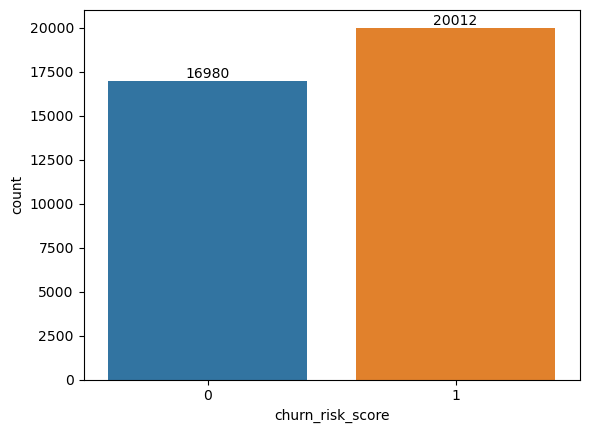

In [36]:
# plot perbandingan data target
ax = sns.countplot(x=df.churn_risk_score, data=df)
ax.bar_label(ax.containers[0])
plt.show()

Lebih dari 50% nasabah di cap sebagai churn, akan tetapi secara keseluruhan label targetnya cukup balance sehingga tidak perlu dilakukan handling class imbalance.

gender  churn_risk_score
F       0                    8441
        1                   10049
M       0                    8509
        1                    9934
dtype: int64


Text(0.5, 1.0, 'Jumlah Churn Risk Berdasarkan Gender')

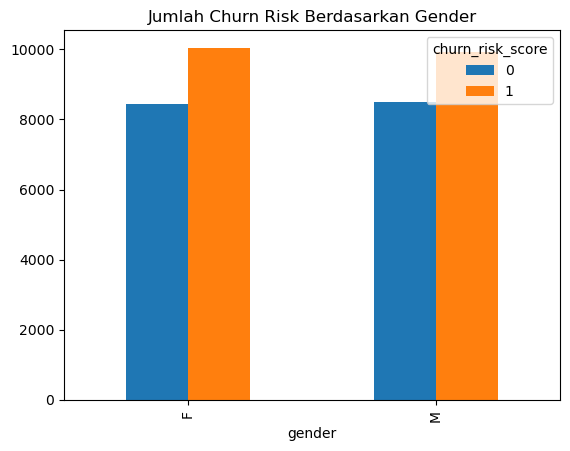

In [37]:
#melihat total kategori gender berdasarkan churn_risk_score
print(df.groupby(['gender','churn_risk_score']).size())
df.groupby(['gender','churn_risk_score']).size().unstack(fill_value=0).plot(kind='bar').set_title('Jumlah Churn Risk Berdasarkan Gender')
 

- Perbandingan nasabah customer antara female dan male hanya berbeda sedikit. Dimana female yang not churn sebanyak 8441, dan yang churn sebanyak 10049. Sedangkan male yang not churn sebanyak 8509, dan yang churn sebanyak 9934. Dari grafik tersebut dapat dilihat baik nasabah female atau male kebanyakan mengalami churn.

membership_category  churn_risk_score
Basic Membership     0                    251
                     1                   7473
Gold Membership      0                   4282
                     1                   2513
No Membership        0                    226
                     1                   7466
Platinum Membership  0                   4338
Premium Membership   0                   4455
Silver Membership    0                   3428
                     1                   2560
dtype: int64


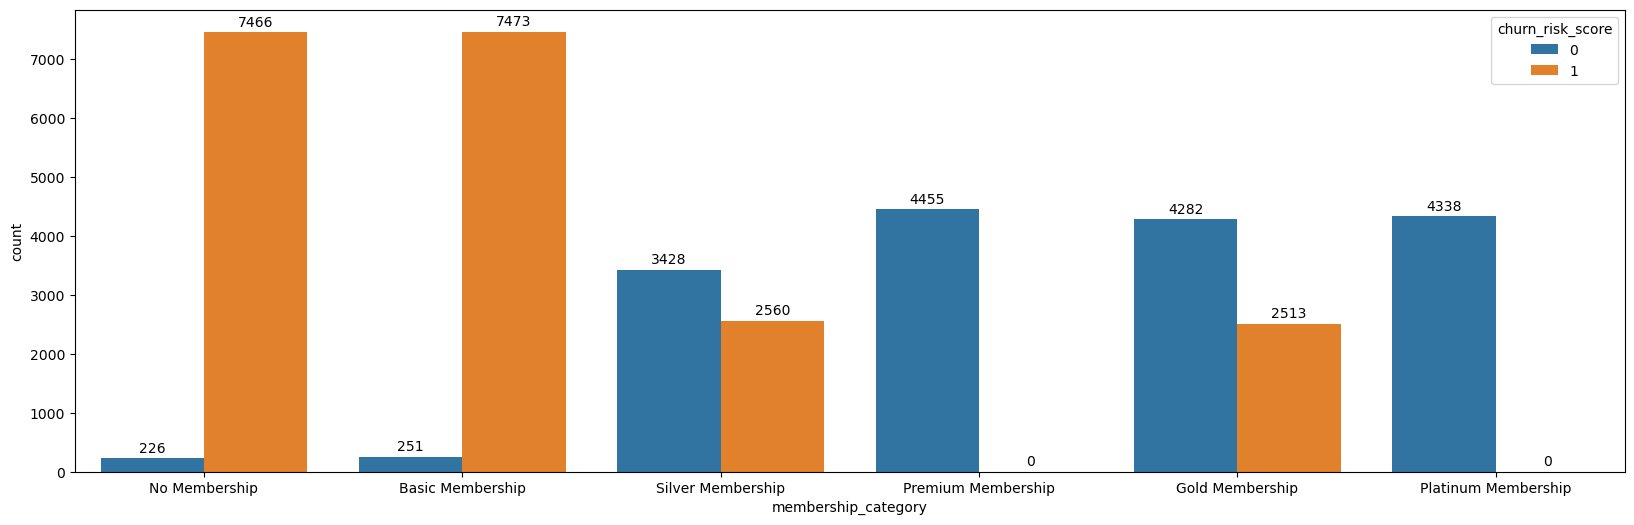

In [38]:
#melihat total kategori membership_category berdasarkan churn_risk_score
print(df.groupby(['membership_category','churn_risk_score']).size())
plt.figure(figsize=(20,6))
ax = sns.countplot(x='membership_category', hue='churn_risk_score',data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

Kebanyakan nasabah yang meninggalkan perusahaan (churn) memiliki kategori member yang rendah sehingga dapat disimpulkan bahwa semakin tinggi member maka nasabah tidak akan meninggalkan perusahaan (not churn) karena pelanggan mempercayai perusahaan. Dapat dilihat pada 2 kategori tertinggi yaitu premium membership dan platinum membership.

membership_category  gender
Basic Membership     F         3858
                     M         3852
Gold Membership      F         3434
                     M         3351
No Membership        F         3883
                     M         3798
Platinum Membership  F         2119
                     M         2215
Premium Membership   F         2195
                     M         2249
Silver Membership    F         3001
                     M         2978
dtype: int64


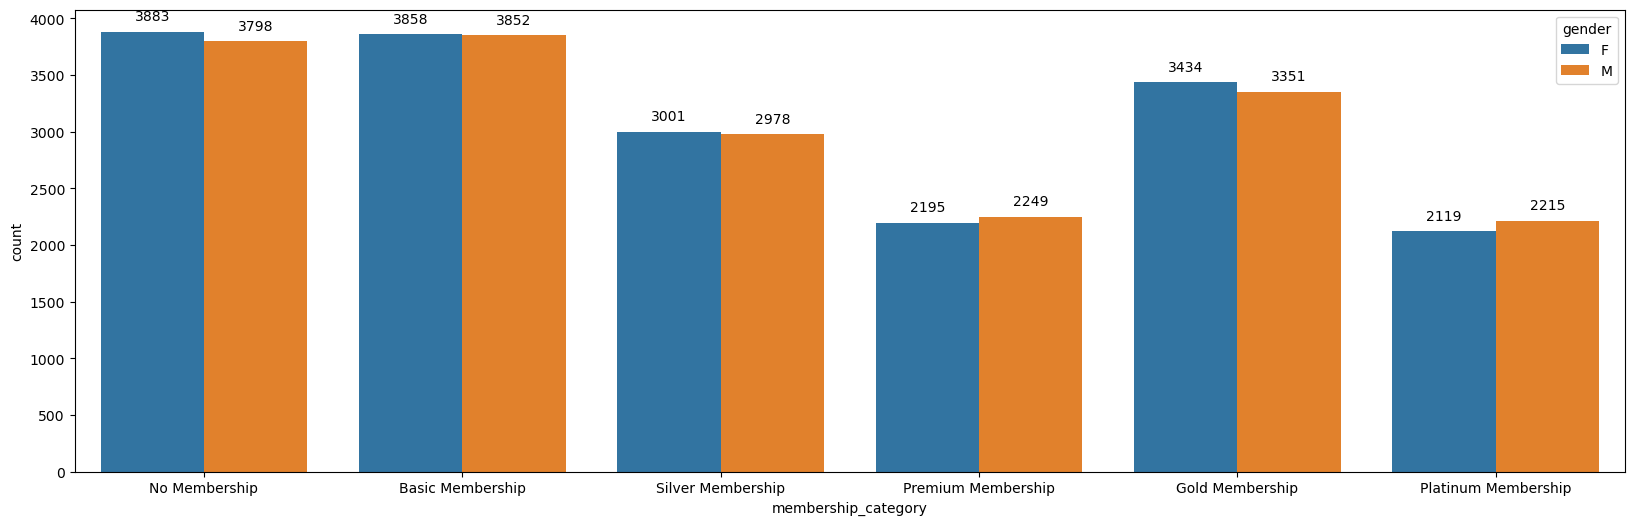

In [115]:
#melihat total kategori membership_category berdasarkan gender
print(df.groupby(['membership_category','gender']).size())
plt.figure(figsize=(20,6))
ax = sns.countplot(x='membership_category', hue='gender',data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

Berdasarkan gender, rata-rata nasabah paling banyak adalah dengan category no membership.

membership_category  joined_through_referral
Basic Membership     No                         3260
                     Yes                        3324
Gold Membership      No                         2977
                     Yes                        2837
No Membership        No                         3122
                     Yes                        3441
Platinum Membership  No                         1949
                     Yes                        1743
Premium Membership   No                         2018
                     Yes                        1813
Silver Membership    No                         2513
                     Yes                        2557
dtype: int64


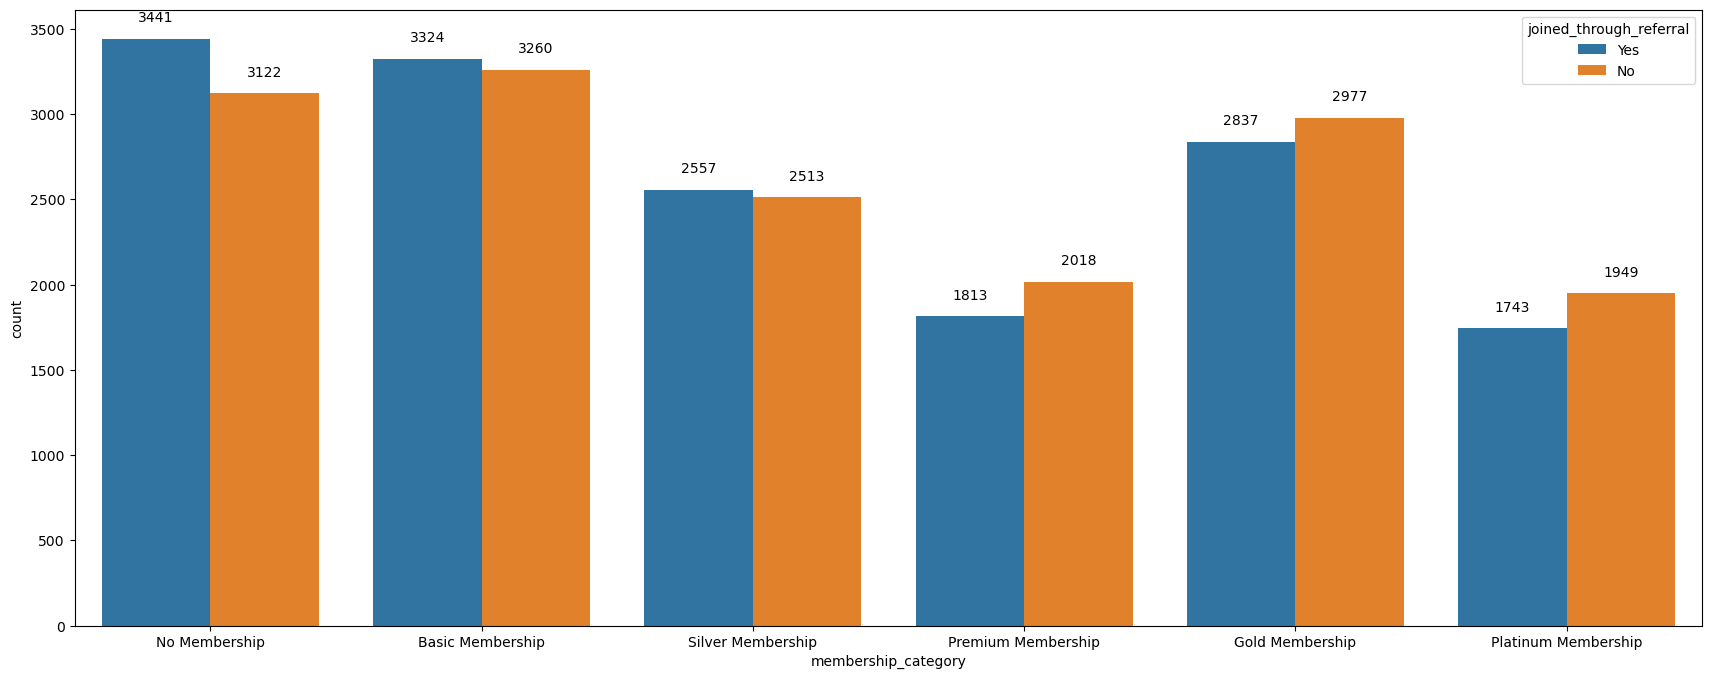

In [119]:
#melihat total kategori membership_category berdasarkan joined_through_referral
print(df.groupby(['membership_category','joined_through_referral']).size())
plt.figure(figsize=(21,8))
ax = sns.countplot(x='membership_category', hue='joined_through_referral',data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

feedback                  churn_risk_score
No reason specified       0                   2296
                          1                   3994
Poor Customer Service     0                   2260
                          1                   3992
Poor Product Quality      0                   2223
                          1                   4127
Poor Website              0                   2309
                          1                   3962
Products always in Stock  0                   1382
Quality Customer Care     0                   1360
Reasonable Price          0                   1417
Too many ads              0                   2342
                          1                   3937
User Friendly Website     0                   1391
dtype: int64


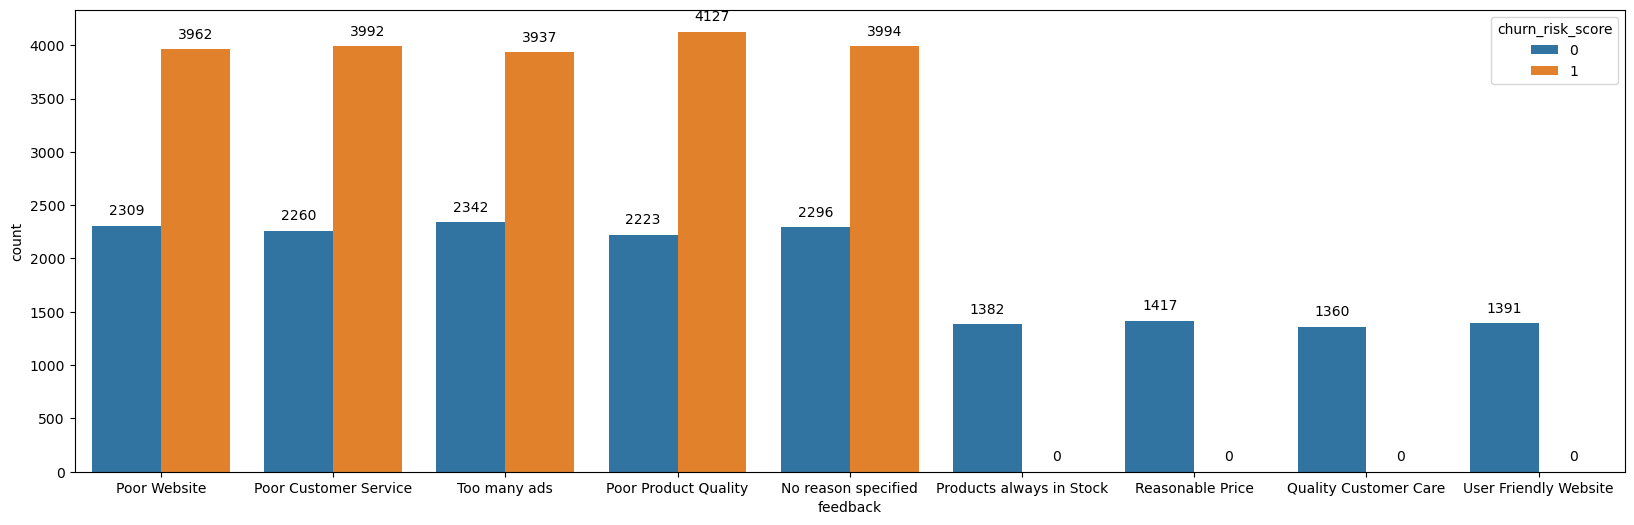

In [114]:
#melihat total kategori feedback berdasarkan churn_risk_score
print(df.groupby(['feedback','churn_risk_score']).size())
plt.figure(figsize=(20,6))
ax = sns.countplot(x='feedback', hue='churn_risk_score',data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

Kebanyakan nasabah yang meninggalkan perusahaan adalah nasabah yang memiliki feedback negatif, diantaranya Poor Website, Poor Customer Service, Too many ads, Poor Product Quality, No reason specified feedback. Sedangkan nasabah yang memberikan feedback positif seperti Product always in stock, Reasonable Price, Quality Customer Care, User Firendly Website tidak ada yang meninggalkan perusahaan atau tetap menjadi nasabah.

# Feature Engineering

## **``Create Data Inference``**

Section ini menjelaskan cara membuat inference data. Untuk membuat inference data, saya akan menyisihkan 10 data dari dataset awal.

In [39]:
# create data inference
data = df.copy()
df_inf = data.sample(10, random_state=0).sort_index()
df_inf.reset_index(drop=True).head(10)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_month
0,59,M,Town,Gold Membership,No,Without Offers,Desktop,Wi-Fi,9,395.30,43978.54,0.000000,789.600000,Yes,Yes,No,Not Applicable,Too many ads,0,11
1,26,F,City,Basic Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,16,220.86,33749.09,15.000000,521.360000,Yes,No,No,Not Applicable,No reason specified,1,4
2,49,M,Town,Basic Membership,NaN,Without Offers,Desktop,Wi-Fi,7,153.39,41942.57,22.000000,626.280000,Yes,No,Yes,Unsolved,No reason specified,1,12
3,21,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,19,34.07,47663.39,6.000000,611.780000,No,Yes,No,Not Applicable,Too many ads,1,3
4,62,F,NaN,Basic Membership,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,24,200.04,24566.68,16.000000,672.930000,Yes,No,No,Not Applicable,No reason specified,0,12
5,56,M,City,No Membership,No,NaN,Smartphone,Mobile_Data,10,263.62,11435.15,13.000000,666.170000,Yes,Yes,Yes,Solved in Follow-up,No reason specified,1,9
6,36,F,NaN,Premium Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,17,0.00,37557.53,13.000000,420.327072,Yes,No,No,Not Applicable,No reason specified,0,11
7,59,F,NaN,No Membership,NaN,Without Offers,Smartphone,Wi-Fi,10,36.85,28439.25,18.000000,661.680000,Yes,No,No,Not Applicable,Poor Website,1,2
8,49,M,Town,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,8,732.43,78921.24,26.491388,706.440000,Yes,No,No,Not Applicable,Quality Customer Care,0,12
9,36,M,NaN,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,8,84.07,98334.89,40.793835,771.450000,Yes,No,No,Not Applicable,User Friendly Website,0,11


In [40]:
# Saving data inference as .csv file
df_inf.to_csv('h8dsft_P2M1_inference_Fitri Octaviani.csv')

In [41]:
# remove data inference from dataset
df_analys = data.drop(df_inf.index)
print('size of original dataset  :',data.shape)
print('size of dataset after data inference is removed :',df_analys .shape)
df_analys .head()

size of original dataset  : (36992, 20)
size of dataset after data inference is removed : (36982, 20)


,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_month
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,4
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,3
2,26,F,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,2
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1,12
4,64,M,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0,3


## **``Feature Selection``**

Section ini menjelaskan tentang proses pembuatan model dengan feature selection menggunakan metode phik.  

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score', 'joining_month']


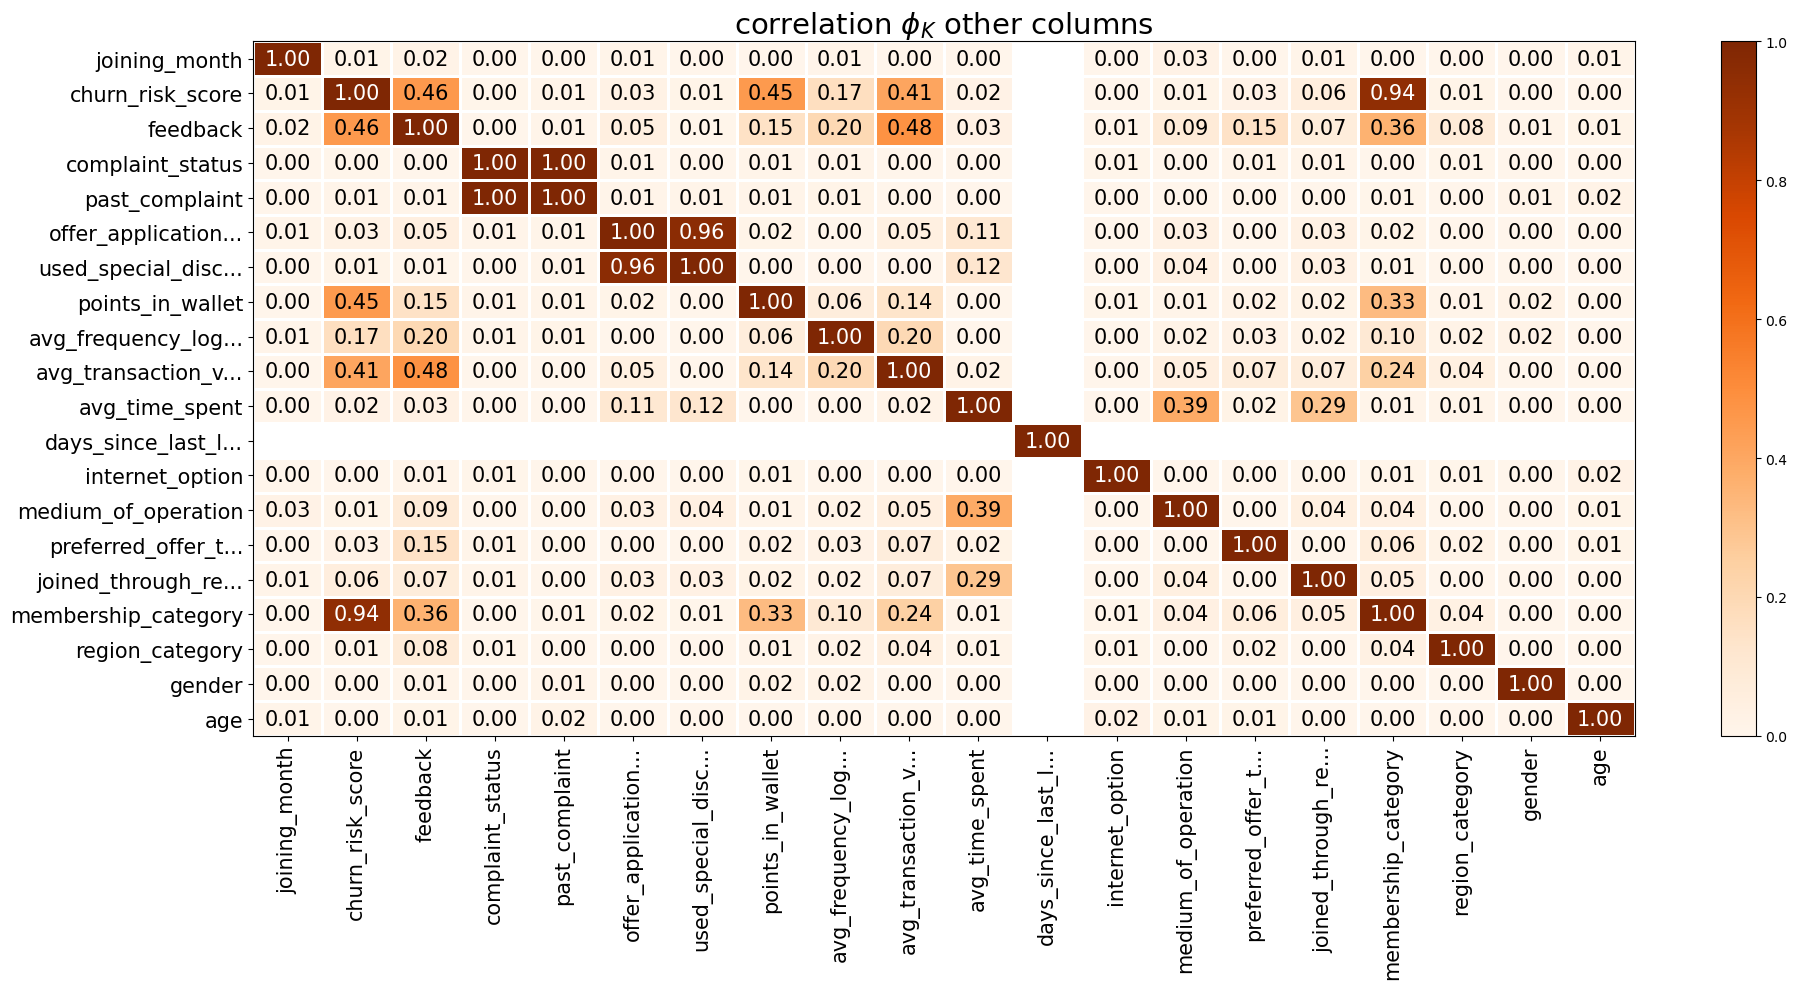

In [42]:
# get the phi_k correlation matrix between all variables
phik_matrix = df_analys.phik_matrix()
plot_correlation_matrix(phik_matrix.values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        vmin=0, vmax=1, color_map="Oranges", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(20,10))
plt.tight_layout()

In [43]:
# cek korelasi yang memiliki signifikansi terhadap death_event
df_analys.phik_matrix().churn_risk_score.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score', 'joining_month']


churn_risk_score                1.000000
membership_category             0.942347
feedback                        0.455412
points_in_wallet                0.449568
avg_transaction_value           0.408627
avg_frequency_login_days        0.165191
joined_through_referral         0.055805
offer_application_preference    0.028287
preferred_offer_types           0.026151
avg_time_spent                  0.024476
used_special_discount           0.014375
region_category                 0.013383
medium_of_operation             0.013035
joining_month                   0.011773
past_complaint                  0.011075
complaint_status                0.004268
internet_option                 0.001399
gender                          0.000000
age                             0.000000
days_since_last_login                NaN
Name: churn_risk_score, dtype: float64

Berdasarkan korelasi phik matrix, feature seperti : days_since_last_login, age, gender tidak memiliki korelasi dengan churn_risk_score. Selain itu, terdapat beberapa feature yang mempunyai korelasi tinggi, sehingga untuk feature yang saya gunakan adalah dengan nilai threshold diatas 0.02

In [44]:
dropped_features = ['days_since_last_login', 'age', 'gender',
                    'internet_option', 'complaint_status', 'joining_month',
                    'past_complaint', 'medium_of_operation', 'region_category', 
                    'used_special_discount']
df_analys.drop(columns=dropped_features,inplace=True)

## **``Split Dataset``**

Section ini dilakukan splitting data dengan membagi training set, testing set, dan validation set.

In [45]:
x = df_analys.drop(columns = ['churn_risk_score']).copy()
y = df_analys['churn_risk_score']
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=0.8, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, stratify=y_train, random_state=42)

In [46]:
print(x_train.shape), print(y_train.shape)
print(x_val.shape), print(y_val.shape)
print(x_test.shape), print(y_test.shape)

(23668, 9)
(23668,)
(5917, 9)
(5917,)
(7397, 9)
(7397,)


(None, None)

## **``Handling Missing Value``**

In [47]:
# melihat informasi dataset dari tipe data, jumlah baris, dan memori data
df_analys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36982 entries, 0 to 37009
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   membership_category           36982 non-null  object 
 1   joined_through_referral       31546 non-null  object 
 2   preferred_offer_types         36695 non-null  object 
 3   avg_time_spent                36982 non-null  float64
 4   avg_transaction_value         36982 non-null  float64
 5   avg_frequency_login_days      36982 non-null  float64
 6   points_in_wallet              36982 non-null  float64
 7   offer_application_preference  36982 non-null  object 
 8   feedback                      36982 non-null  object 
 9   churn_risk_score              36982 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 3.1+ MB


In [48]:
# menampilkan missing value
df_analys.isnull().sum()

membership_category                0
joined_through_referral         5436
preferred_offer_types            287
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
offer_application_preference       0
feedback                           0
churn_risk_score                   0
dtype: int64

In [49]:
# percentase missing value
print("percentage missing value joined_through_referral: ", (df_analys.joined_through_referral.isna().sum() / df_analys.churn_risk_score.count()) * 100)
print("percentage missing value preferred_offer_types: ", (df_analys.preferred_offer_types.isna().sum() / df_analys.churn_risk_score.count()) * 100)

percentage missing value joined_through_referral:  14.699042777567465
percentage missing value preferred_offer_types:  0.7760532150776054


- Dalam kolom joined_through_referral terdapat missing value sebanyak 5442 baris atau 14.7%
- Dalam kolom preferred_offer_types terdapat missing value sebanyak 288 baris atau 0.78%

Dalam handling missing value pada kolom joined_through_referral ini saya menggunakan imputasi mode karena nilai missing value tersebut lebih dari 5%. Dan saya pun menggunakan imputasi mode untuk kolom preferred_offer_types dikarenakan setelah saya mencoba drop missing value tersebut tetap masih ada.

In [50]:
# Mengisi nilai yang hilang dengan modus untuk setiap kolom
df_analys['joined_through_referral'].fillna(df_analys['joined_through_referral'].mode()[0], inplace=True)
df_analys['preferred_offer_types'].fillna(df_analys['preferred_offer_types'].mode()[0], inplace=True)

In [51]:
# menampilkan missing value
df_analys.isnull().sum()

membership_category             0
joined_through_referral         0
preferred_offer_types           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
offer_application_preference    0
feedback                        0
churn_risk_score                0
dtype: int64

Setelah dilakukan imputasi mode, pada dataset tersebut sudah tidak ada missing value.

## **``Handling Outlier``**

Dalam tahap ini akan dilakukan handling outlier pada kolom numerikal kontinu dengan melihat distribusi dan outlier.

In [52]:
def diagnostic_plots(df_analys):
    # select only numerical columns
    numeric_col = df_analys.select_dtypes(include=['float64', 'int64'])

    for col in numeric_col:
        plt.figure(figsize=(16,4))
        plt.subplot(1,2,1)
        sns.histplot(df_analys[col], bins=20)
        plt.title(f'Histogram of {col}')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_analys[col])
        plt.title(f'Boxplot of {col}')
        plt.show()


In [53]:
numeric_col = df_analys.select_dtypes(include=['float64', 'int64'])

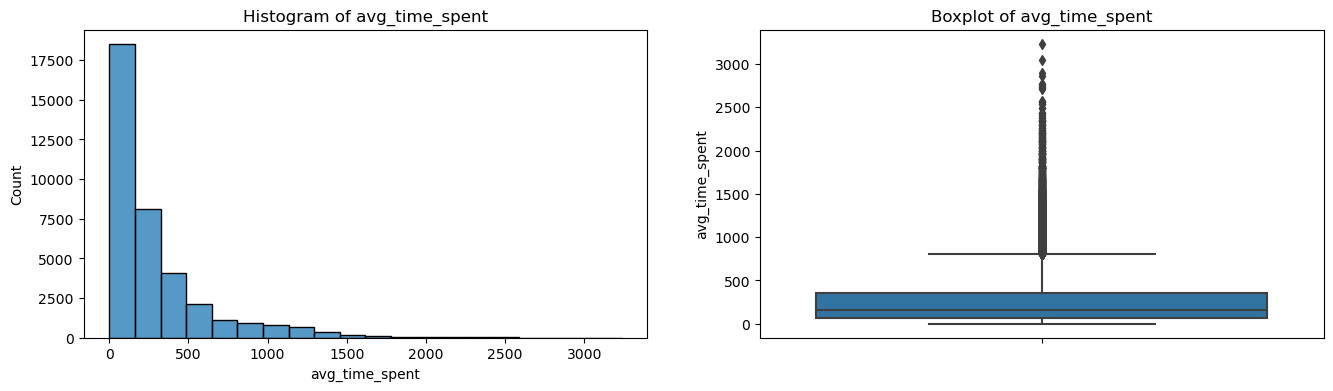

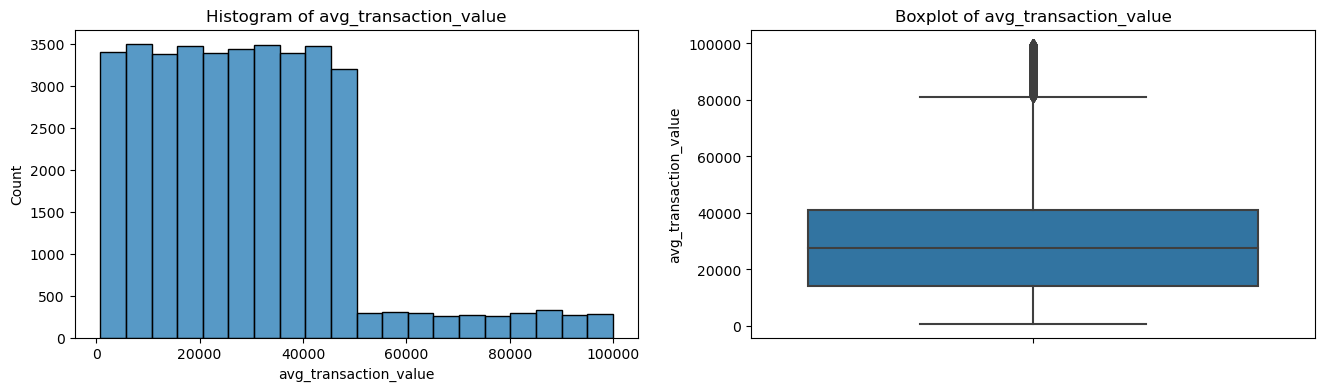

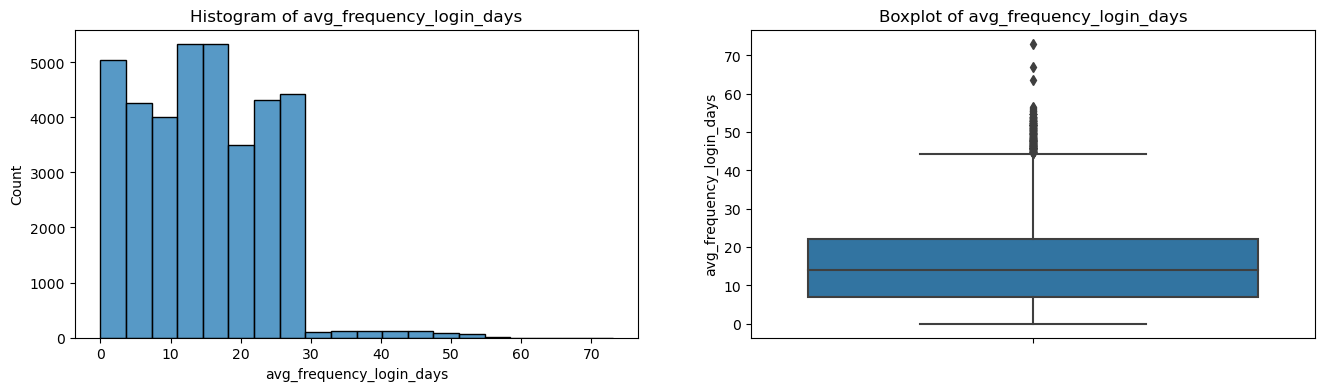

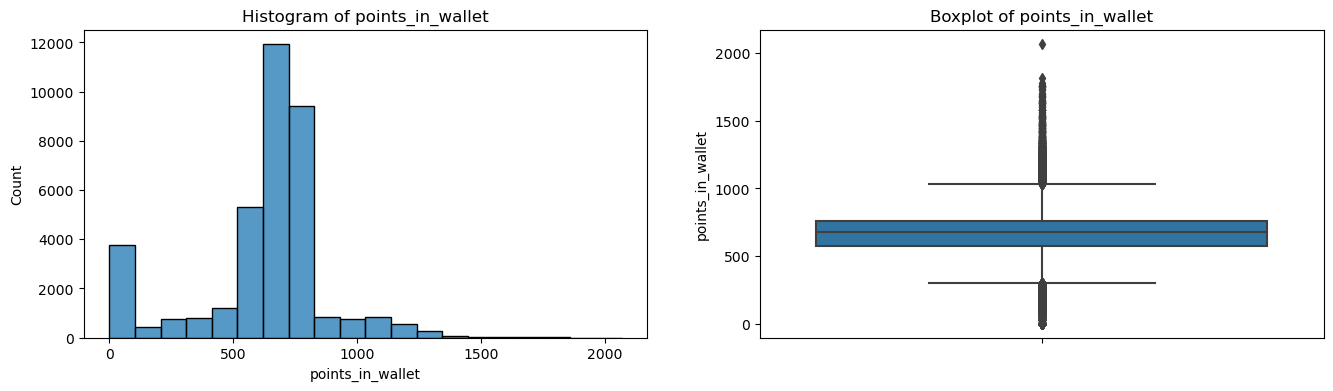

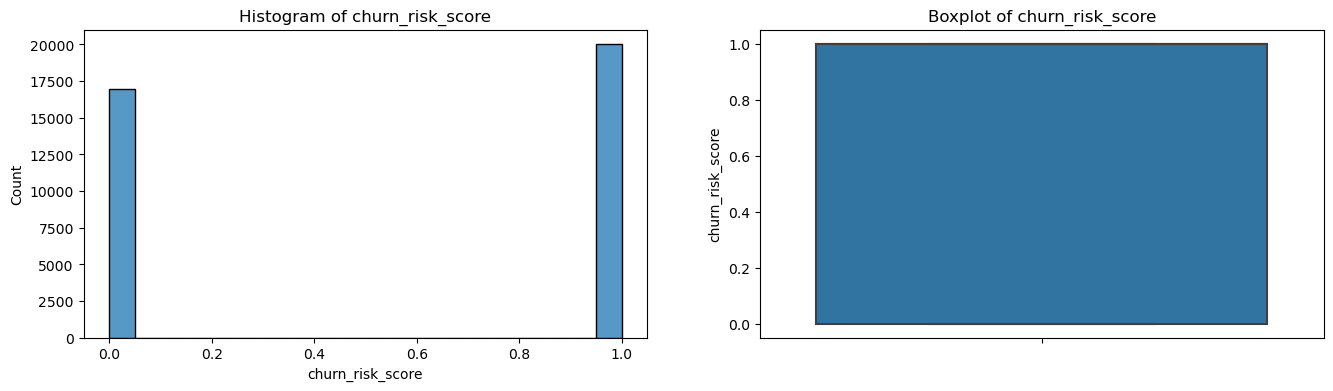

In [54]:
diagnostic_plots(df_analys)

In [55]:
# Get the skew for all numerical columns
for col in numeric_col:
    print(f'Skewness of {col}: {skew(df_analys[col])}')

Skewness of avg_time_spent: 2.276364768971329
Skewness of avg_transaction_value: 1.0107149215928706
Skewness of avg_frequency_login_days: 0.3896912891874653
Skewness of points_in_wallet: -0.7733399033342622
Skewness of churn_risk_score: -0.1645255379217107


Pada kolom numerikal, kolom yang memiliki outlier adalah avg_time_spent dengan skew 2.276, kolom avg_transaction_value dengan skew 1.010, kolom avg_frequency_login_days dengan skew 0.389, kolom points_in_wallet dengan skew -0.773. Sehingga dalam hal ini akan dilakukan handling outlier menggunakan metode capping IQR.

In [56]:
#memeriksa outlier avg_time_spent
Q1 = df_analys['avg_time_spent'].quantile(.25)
Q3 = df_analys['avg_time_spent'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_analys[(df_analys['avg_time_spent'] <= lower) | (df_analys['avg_time_spent'] >= upper)]

print('percentage: ', len(outlier)/df_analys.shape[0] * 100, '%')
     

percentage:  8.404088475474556 %


In [57]:
#memeriksa outlier avg_transaction_value
Q1 = df_analys['avg_transaction_value'].quantile(.25)
Q3 = df_analys['avg_transaction_value'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_analys[(df_analys['avg_transaction_value'] <= lower) | (df_analys['avg_transaction_value'] >= upper)]

print('percentage: ', len(outlier)/df_analys.shape[0] * 100, '%')
     

percentage:  3.0555405332323833 %


In [58]:
#memeriksa outlier avg_frequency_login_days
Q1 = df_analys['avg_frequency_login_days'].quantile(.25)
Q3 = df_analys['avg_frequency_login_days'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_analys[(df_analys['avg_frequency_login_days'] <= lower) | (df_analys['avg_frequency_login_days'] >= upper)]

print('percentage: ', len(outlier)/df_analys.shape[0] * 100, '%')
     

percentage:  0.7057487426315505 %


In [59]:
#memeriksa outlier points_in_wallet
Q1 = df_analys['points_in_wallet'].quantile(.25)
Q3 = df_analys['points_in_wallet'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_analys[(df_analys['points_in_wallet'] <= lower) | (df_analys['points_in_wallet'] >= upper)]

print('percentage: ', len(outlier)/df_analys.shape[0] * 100, '%')
     

percentage:  18.0790654913201 %


In [60]:
# define kolom
cens_col = ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

# create the capper
winsorizer = Winsorizer(capping_method='iqr',
                        tail = 'both',
                        fold = 1.5,
                        variables=cens_col)

# melakukan capping pada data train
df_train = winsorizer.fit_transform(df_analys)

In [61]:
def diagnostic_plots(df_train):
    # select only numerical columns
    numeric_col = df_train.select_dtypes(include=['float64', 'int64'])

    for col in numeric_col:
        plt.figure(figsize=(16,4))
        plt.subplot(1,2,1)
        sns.histplot(df_train[col], bins=20)
        plt.title(f'Histogram of {col}')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_train[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

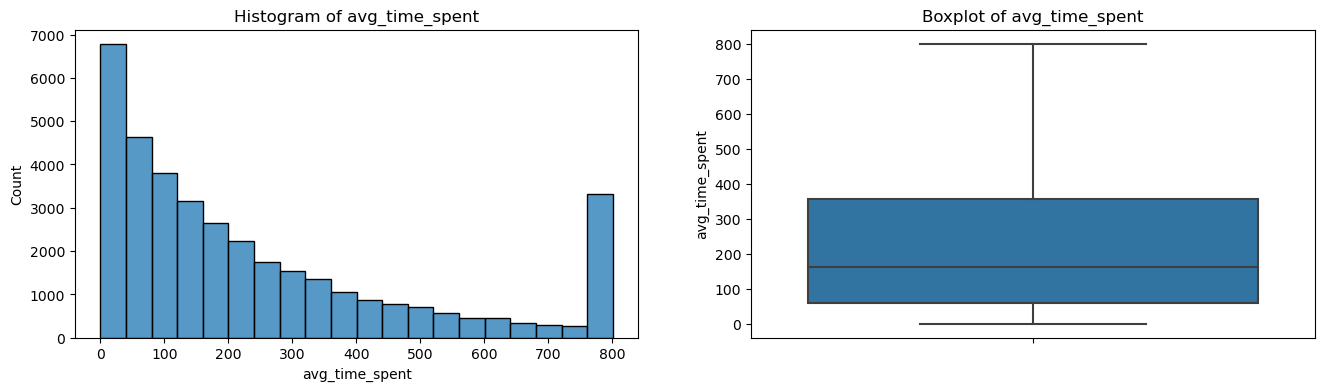

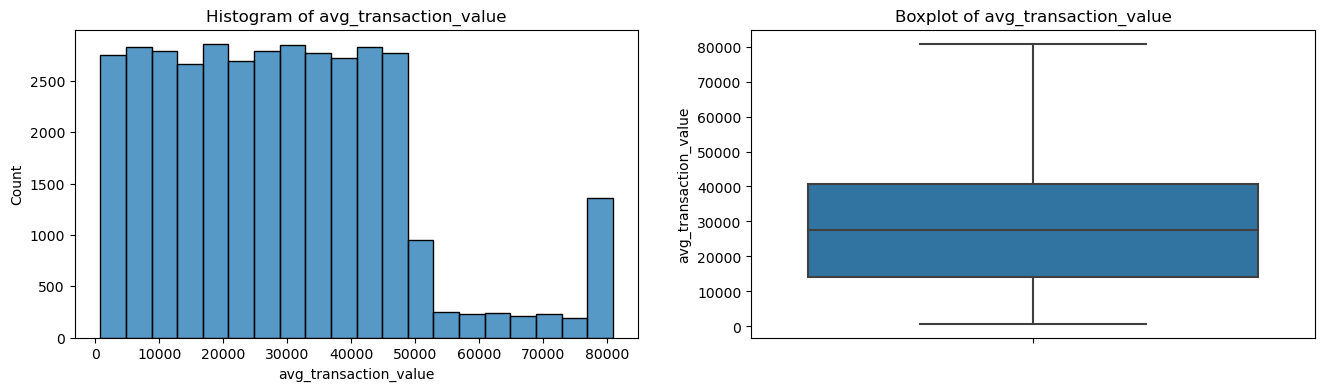

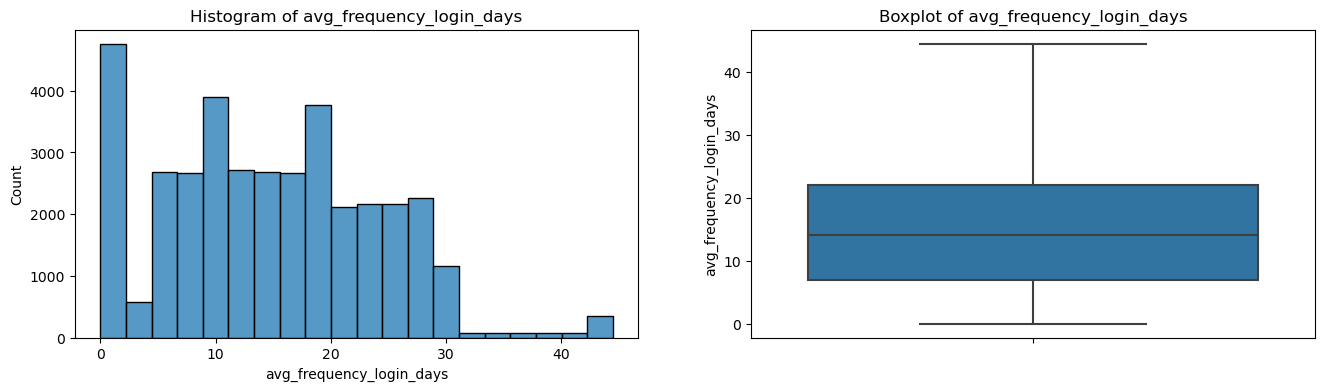

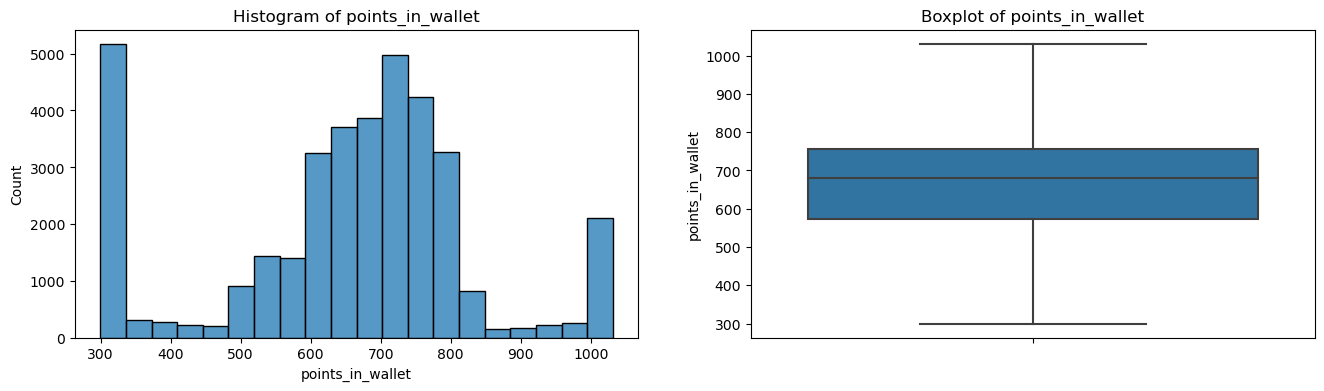

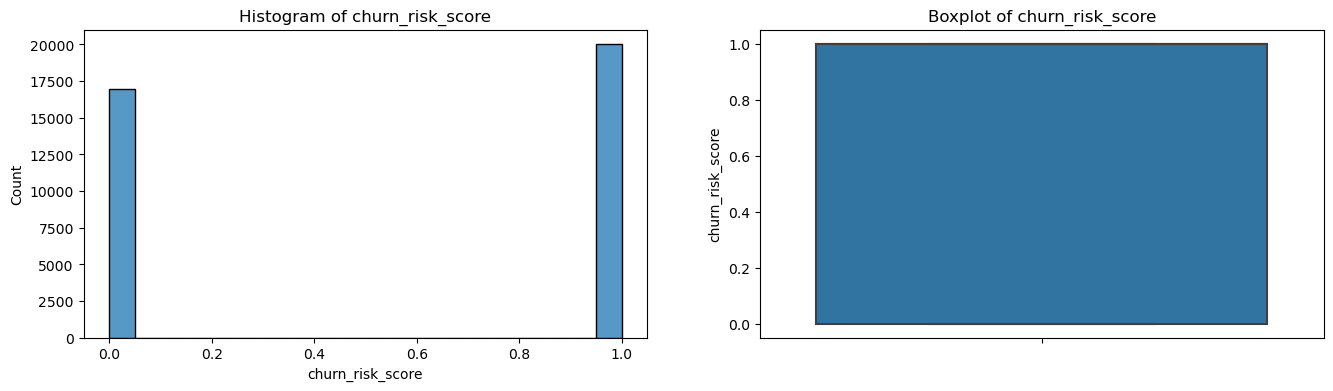

In [62]:
diagnostic_plots(df_train)

Setelah dilakukan handling outlier, kolom kolom tersebut sudah tidak memiliki outliers.

## **``Pipeline using SkLearn``**

Pada section ini dilakukan pembuatan pipeline dimana untuk :
- Numerical columns akan di scale menggunakan standardscaler karena skew masih tergolong normal, untuk missing value menggunakan imputasi median, dan untuk outlier menggunakan capping IQR. 

- Categorical columns dilakukan encoding menggunakan OneHotEncoder, dan missing value menggunakan imputasi most_frequent.

- Dan setelah itu kedua data hasil numerical dan kategorikal tersebut akan digabungkan ke dalam column transformer dengan variabel bernama preprocessor.

In [63]:
df_train

,membership_category,joined_through_referral,preferred_offer_types,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,offer_application_preference,feedback,churn_risk_score
0,No Membership,Yes,Without Offers,801.14375,38604.69,10.0,627.48,Yes,Poor Website,1
1,Basic Membership,Yes,Without Offers,338.15000,7665.66,17.0,575.97,No,Poor Customer Service,1
2,Silver Membership,No,Credit/Debit Card Offers,235.14000,37671.69,5.0,767.93,No,Too many ads,0
3,No Membership,No,Credit/Debit Card Offers,56.67000,15678.14,11.0,590.22,Yes,Too many ads,1
4,Silver Membership,No,Gift Vouchers/Coupons,153.99000,8422.68,0.0,722.04,No,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...
37005,Gold Membership,No,Credit/Debit Card Offers,199.33000,29455.29,9.0,846.52,Yes,User Friendly Website,0
37006,Gold Membership,Yes,Without Offers,368.50000,27038.47,8.0,835.98,Yes,Reasonable Price,0
37007,Gold Membership,Yes,Without Offers,272.13000,39305.35,27.0,714.90,Yes,Poor Customer Service,0
37008,Gold Membership,Yes,Without Offers,65.07000,46108.73,6.0,744.99,Yes,Poor Website,0


In [64]:
num_features = ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
cat_features = ['membership_category', 'joined_through_referral', 'preferred_offer_types', 'offer_application_preference', 'feedback']

In [65]:
num_transformer = Pipeline([
    ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [66]:
preprocessor = ColumnTransformer(
    [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
    ],
    remainder='passthrough',
    verbose=True
)

In [67]:
# fit preprocessor on data train
preprocessor.fit(x_train)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['avg_time_spent', 'avg_transaction_value',
                                  'avg_frequency_login_days',
                                  'points_in_wallet']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['membership_category',
                                  'joined_through_referral',
                                  'preferred_offer_types',
                                  'offer_application_preference',
                                  'feedback'])],
                  verbose=True)

In [68]:
# transform on train, valid, and test data
x_train_tran = preprocessor.fit_transform(x_train)
x_val_tran = preprocessor.transform(x_val)
x_test_tran = preprocessor.transform(x_test)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


In [69]:
x_train.shape

(23668, 9)

In [70]:
y_train.shape

(23668,)

In [71]:
x_val.shape

(5917, 9)

## **``Pipeline using Tensorflow``**

Setelah membuat pipeline untuk scaler dan encoding, pipeline akan diterapkan ke pipeline yang berbeda dari pipeline scaler/encoding. Ini akan disebut sebagai pipeline tensorflow. Dalan pipeline ini, jumlah batch adalah 32 dan shuffle 100. Angka-angka ini dipilih secara acak sebagai trial-and-error.

In [72]:
# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train_tran, y_train)).shuffle(1000).batch(32)
valid_ds = tf.data.Dataset.from_tensor_slices((x_val_tran, y_val)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test_tran, y_test)).batch(32)

# Model

In [73]:
x_train_tran.shape

(23668, 26)

In [74]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

## **``Sequential``**

Dalam neural network sequential, saya membuat model layer-by-layer. Berbagi layer atau percabangan layer dan beberapa input atau output tidak diperbolehkan. Jadi dalam model ini, saya dapat melihat dari flowchart bahwa model sequential pada dasarnya adalah model series.

Hyperparameter dalam model ini :

Jumlah neuron pada input layer sama dengan jumlah kolom pada train set
Terdapat 3 hidden layer pada model ini, hidden layer 1 memiliki 64 neuron, hidden layer 2 memiliki 32 neuron, hidden layer 3 memiliki 16 neuron.

In [75]:
hidden_units1 = 64
hidden_units2 = 32
hidden_units3 = 16
learning_rate = 0.01

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu', name='hidden_layer_1', input_shape=(x_train_tran.shape[1],)),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='sigmoid')
  ])
  return model
# build the model
ann = build_model_using_sequential()

In [76]:
ann.compile(optimizer='Adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
            )

In [77]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 64)                1728      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainabl

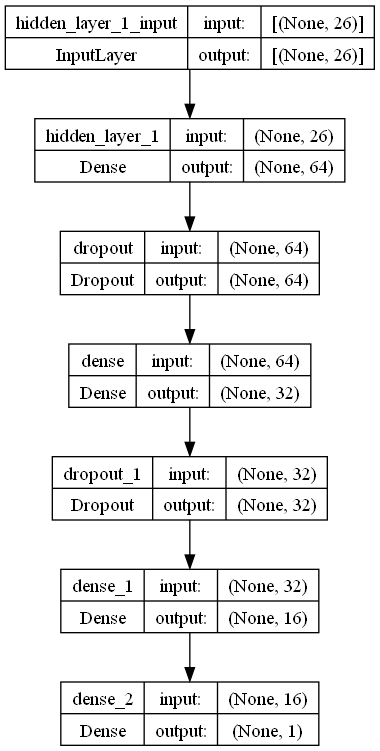

In [78]:
#plot model sequential
tf.keras.utils.plot_model(ann, show_shapes=True)

In [79]:
#training model
batch=32

history_ann_seq= ann.fit(train_ds, 
                        validation_data= (valid_ds),
                        #validation_split=0.2,
                         batch_size= batch,
                         epochs= 100,
                         callbacks= callbacks1
                         )

Epoch 1/100


740/740 [==============================] - 4s 4ms/step - loss: 0.3118 - accuracy: 0.8463 - val_loss: 0.2474 - val_accuracy: 0.9018
Epoch 2/100
740/740 [==============================] - 4s 5ms/step - loss: 0.2467 - accuracy: 0.8928 - val_loss: 0.2302 - val_accuracy: 0.9212
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2210 - accuracy: 0.9141 - val_loss: 0.1937 - val_accuracy: 0.9253
Epoch 4/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2038 - accuracy: 0.9198 - val_loss: 0.1804 - val_accuracy: 0.9287
Epoch 5/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1964 - accuracy: 0.9207 - val_loss: 0.1820 - val_accuracy: 0.9258
Epoch 6/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1939 - accuracy: 0.9210 - val_loss: 0.1759 - val_accuracy: 0.9268
Epoch 7/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1895 - accuracy: 0.9230 - val_loss: 0.1807 - val_accuracy: 0.9226
Epoch 8/100

In [80]:
history_sequen_df = pd.DataFrame(history_ann_seq.history)
history_sequen_df

,loss,accuracy,val_loss,val_accuracy
0,0.311776,0.846290,0.247398,0.901808
1,0.246682,0.892767,0.230212,0.921244
2,0.220997,0.914146,0.193692,0.925300
3,0.203788,0.919850,0.180443,0.928680
4,0.196389,0.920695,0.181965,0.925807
5,0.193906,0.921033,0.175851,0.926821
6,0.189503,0.922976,0.180728,0.922596
7,0.187725,0.923441,0.172619,0.927328
8,0.186697,0.923737,0.172941,0.925976
9,0.181273,0.925173,0.170233,0.923948


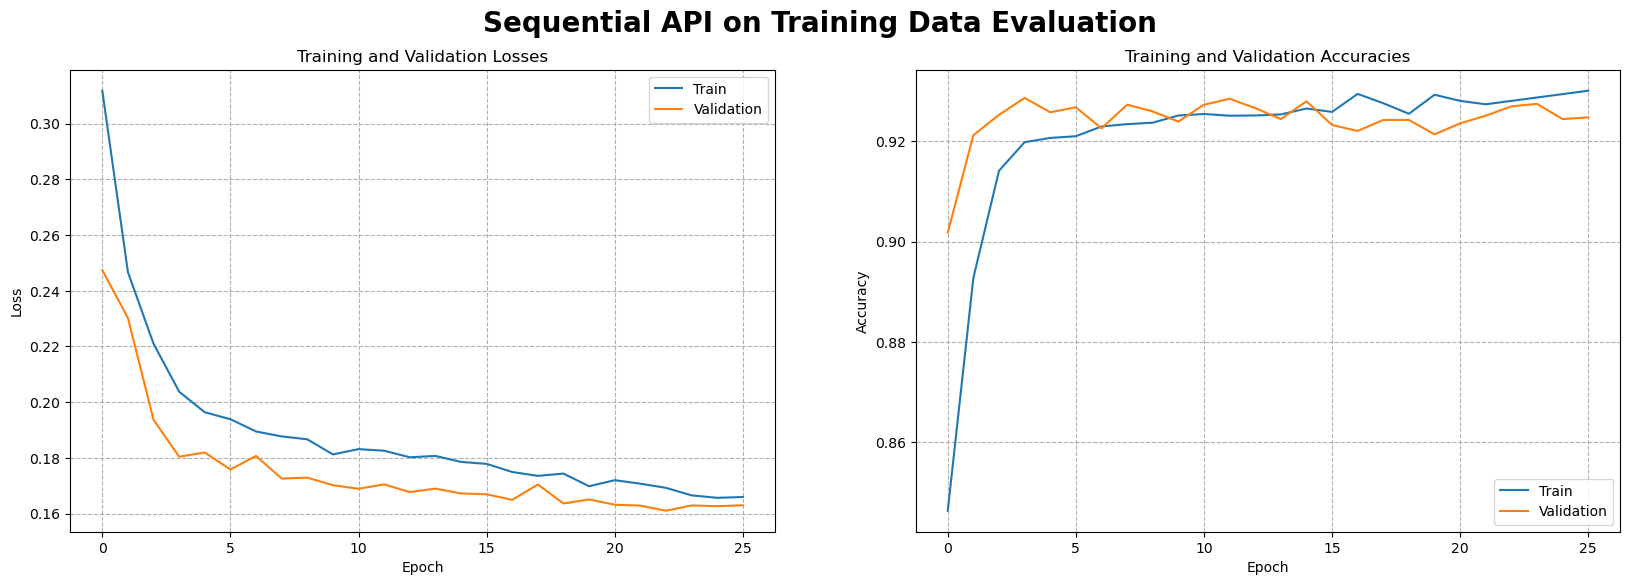

In [81]:
# Plot training & validation loss values
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Sequential API on Training Data Evaluation', fontsize=20, weight='bold')

plt.subplot(1, 2, 1)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_ann_seq.history['loss'])
plt.plot(history_ann_seq.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(linestyle='--')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.title("Training and Validation Accuracies", fontsize=12)
plt.plot(history_ann_seq.history['accuracy'])
plt.plot(history_ann_seq.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(linestyle='--')

plt.show()

In [82]:
test_loss, test_acc = ann.evaluate(test_ds)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')


 23/232 [=>............................] - ETA: 0s - loss: 0.1749 - accuracy: 0.9321

232/232 [==============================] - 1s 3ms/step - loss: 0.1667 - accuracy: 0.9283
Test loss: 0.1667
Test accuracy: 0.9283


In [83]:
# Model Evaluation of test-set

y_pred_func_imp = ann.predict(train_ds)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_func_imp))

740/740 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.46      0.45      0.46     10864
           1       0.54      0.55      0.55     12804

    accuracy                           0.51     23668
   macro avg       0.50      0.50      0.50     23668
weighted avg       0.51      0.51      0.51     23668



 27/232 [==>...........................] - ETA: 0s

232/232 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3395
           1       0.93      0.94      0.93      4002

    accuracy                           0.93      7397
   macro avg       0.93      0.93      0.93      7397
weighted avg       0.93      0.93      0.93      7397



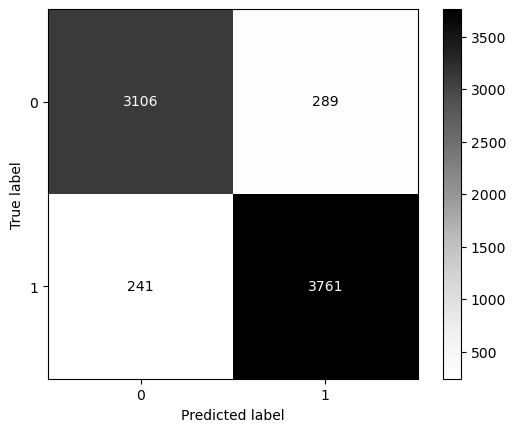

In [84]:
# Model Evaluation of test-set

y_pred_seq = ann.predict(test_ds)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()
     

Pada model sequential API didapatkan accuracy train sebesar 51% sedangkan untuk data test sebesar 93%. Sehingga dalam model sequential API didapatkan bahwa model tersebut termasuk kedalam underfit.

## **``Functional``**

In [85]:
# functional API
input_layer= tf.keras.Input(shape=(x_train_tran.shape[1:]),name='input_layer')

hidden_1= Dense(30, activation='relu', name='hidden_1')(input_layer)
hidden_2= Dense(30, activation='relu', name='hidden_2')(hidden_1)
hidden_3= Dense(10, activation='relu', name='hidden_3')(hidden_2)
concat= tf.keras.layers.concatenate([input_layer,hidden_3])

output_layer= Dense(1, activation='sigmoid', name='output_layer')(concat)

model_func= Model(inputs=input_layer,
                  outputs=output_layer)

model_func.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 26)]         0           []                               
                                                                                                  
 hidden_1 (Dense)               (None, 30)           810         ['input_layer[0][0]']            
                                                                                                  
 hidden_2 (Dense)               (None, 30)           930         ['hidden_1[0][0]']               
                                                                                                  
 hidden_3 (Dense)               (None, 10)           310         ['hidden_2[0][0]']               
                                                                                              

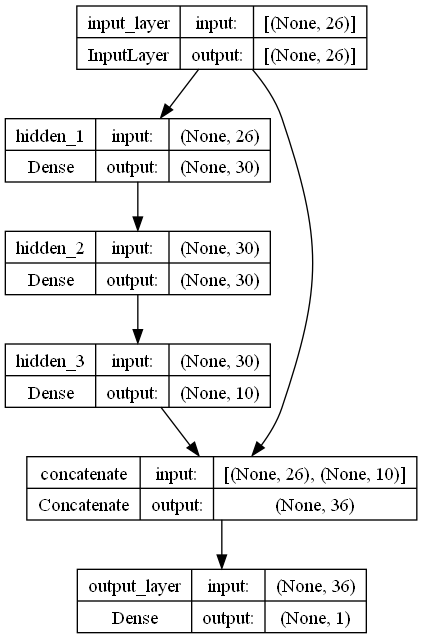

In [87]:
#plot model functional
tf.keras.utils.plot_model(model_func, show_shapes=True)

In [88]:
#training model
batch=32

history_ann_func= model_func.fit(train_ds,
                        validation_data= (valid_ds),
                        # validation_split=0.2,
                         batch_size= batch,
                         epochs= 100,
                         callbacks= callbacks1
                         )

Epoch 1/100
740/740 [==============================] - 4s 4ms/step - loss: 0.3200 - accuracy: 0.8349 - val_loss: 0.2551 - val_accuracy: 0.8787
Epoch 2/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2433 - accuracy: 0.8937 - val_loss: 0.2314 - val_accuracy: 0.9106
Epoch 3/100
740/740 [==============================] - 3s 5ms/step - loss: 0.2082 - accuracy: 0.9196 - val_loss: 0.1849 - val_accuracy: 0.9268
Epoch 4/100
740/740 [==============================] - 4s 5ms/step - loss: 0.1786 - accuracy: 0.9264 - val_loss: 0.1732 - val_accuracy: 0.9234
Epoch 5/100
740/740 [==============================] - 3s 5ms/step - loss: 0.1692 - accuracy: 0.9263 - val_loss: 0.1664 - val_accuracy: 0.9260
Epoch 6/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1660 - accuracy: 0.9269 - val_loss: 0.1612 - val_accuracy: 0.9239
Epoch 7/100
740/740 [==============================] - 3s 5ms/step - loss: 0.1626 - accuracy: 0.9292 - val_loss: 0.1640 - val_accuracy: 0.9292

In [89]:
history_func_df = pd.DataFrame(history_ann_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.320037,0.834883,0.255132,0.878655
1,0.243252,0.893738,0.231359,0.910597
2,0.208215,0.919596,0.184878,0.926821
3,0.178647,0.926356,0.173183,0.923441
4,0.169168,0.926272,0.166373,0.925976
5,0.166015,0.926948,0.161165,0.923948
6,0.162607,0.929187,0.163951,0.929187
7,0.161194,0.929187,0.171707,0.925638
8,0.160935,0.928807,0.159352,0.926990
9,0.159388,0.929567,0.163999,0.928004


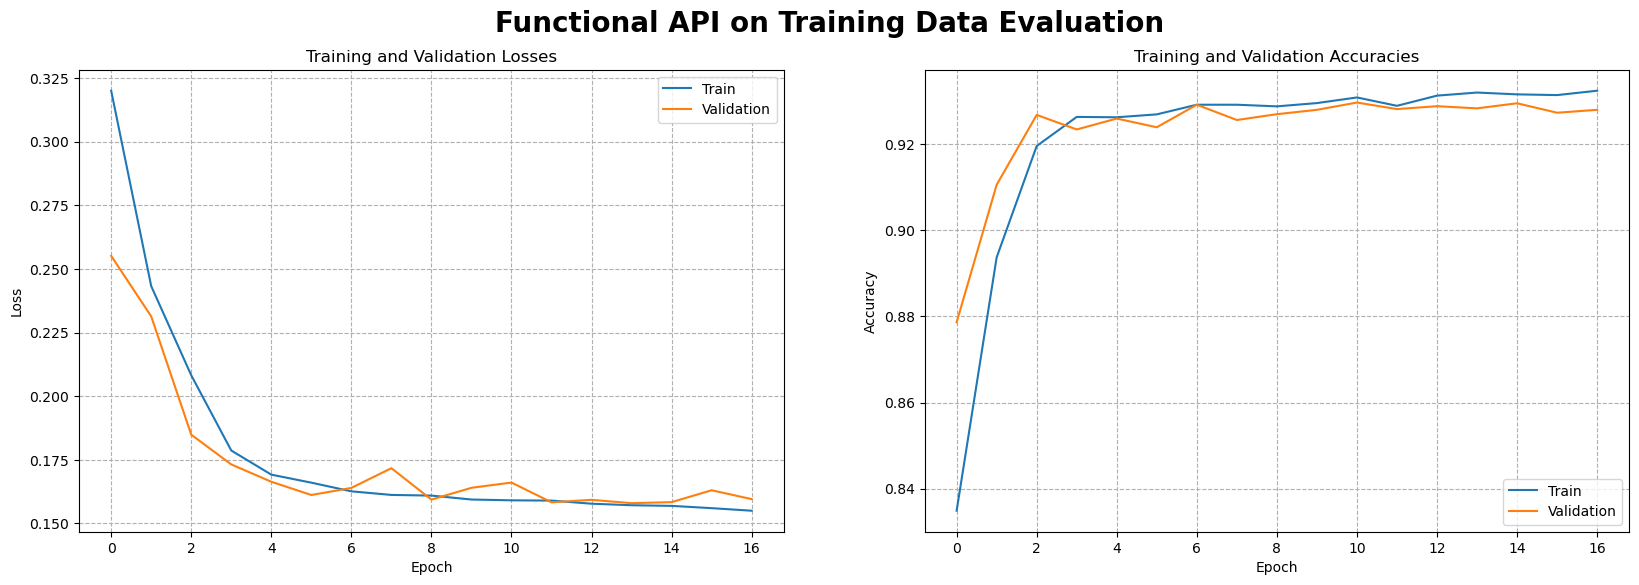

In [90]:
# Plot training & validation loss values
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Functional API on Training Data Evaluation', fontsize=20, weight='bold')

plt.subplot(1, 2, 1)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_ann_func.history['loss'])
plt.plot(history_ann_func.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(linestyle='--')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.title("Training and Validation Accuracies", fontsize=12)
plt.plot(history_ann_func.history['accuracy'])
plt.plot(history_ann_func.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(linestyle='--')

plt.show()

In [91]:
test_loss, test_acc = model_func.evaluate(test_ds)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

 24/232 [==>...........................] - ETA: 0s - loss: 0.1743 - accuracy: 0.9245

232/232 [==============================] - 1s 2ms/step - loss: 0.1661 - accuracy: 0.9263
Test loss: 0.1661
Test accuracy: 0.9263


In [92]:
# Model Evaluation of train-set

y_pred_func_imp = model_func.predict(train_ds)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_func_imp))

740/740 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.46      0.43      0.44     10864
           1       0.54      0.56      0.55     12804

    accuracy                           0.50     23668
   macro avg       0.50      0.50      0.50     23668
weighted avg       0.50      0.50      0.50     23668



 25/232 [==>...........................] - ETA: 0s

232/232 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3395
           1       0.92      0.95      0.93      4002

    accuracy                           0.93      7397
   macro avg       0.93      0.92      0.93      7397
weighted avg       0.93      0.93      0.93      7397



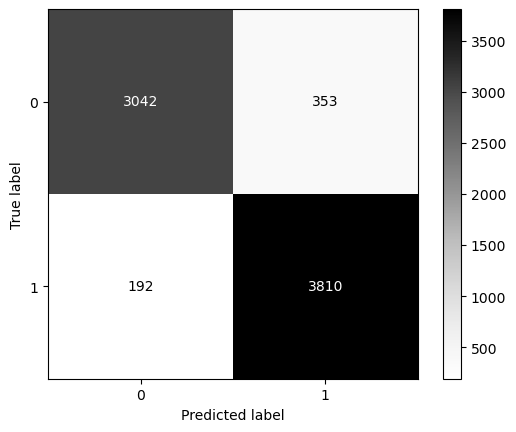

In [93]:
# Model Evaluation of test-set

y_pred_func = model_func.predict(test_ds)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Pada model Functional API didapatkan accuracy train sebesar 50% sedangkan untuk data test sebesar 93%. Sehingga dalam model Functional API didapatkan bahwa model tersebut termasuk kedalam underfit.

# Model Improvement

In [94]:
callbacks2= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best_func.hdf5', monitor='val_loss', save_best_only=True)
]

## **``Sequential Improvement``**

In [95]:
sequen_imp = Sequential()
sequen_imp.add(Dense(10, activation="relu", input_shape=(x_train_tran.shape[1],))) # hidden layer 1
sequen_imp.add(Dense(8, activation="relu")) # hidden layer 2
sequen_imp.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
sequen_imp.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

In [96]:
sequen_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                270       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 367
Trainable params: 367
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Train the Model
history_sequen_imp = sequen_imp.fit(train_ds,
                                   epochs=100,
                                   validation_data= (valid_ds),
                                   batch_size=32,
                                   callbacks= callbacks2
                                   )

Epoch 1/100


740/740 [==============================] - 4s 5ms/step - loss: 0.4032 - accuracy: 0.8077 - val_loss: 0.2594 - val_accuracy: 0.8775
Epoch 2/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2526 - accuracy: 0.8809 - val_loss: 0.2516 - val_accuracy: 0.8972
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2440 - accuracy: 0.9038 - val_loss: 0.2416 - val_accuracy: 0.9155
Epoch 4/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2293 - accuracy: 0.9159 - val_loss: 0.2207 - val_accuracy: 0.9277
Epoch 5/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2082 - accuracy: 0.9243 - val_loss: 0.2054 - val_accuracy: 0.9226
Epoch 6/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1910 - accuracy: 0.9256 - val_loss: 0.1863 - val_accuracy: 0.9277
Epoch 7/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1798 - accuracy: 0.9259 - val_loss: 0.1765 - val_accuracy: 0.9272
Epoch 8/100

In [98]:
history_seq_imp_df = pd.DataFrame(history_sequen_imp.history)
history_seq_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.403191,0.807715,0.259366,0.877472
1,0.252558,0.880936,0.251588,0.897245
2,0.244047,0.903752,0.241581,0.915498
3,0.229337,0.915920,0.220717,0.927666
4,0.208178,0.924328,0.205426,0.922596
5,0.190956,0.925638,0.186257,0.927666
6,0.179777,0.925934,0.176476,0.927159
7,0.173480,0.929018,0.171962,0.926990
8,0.169908,0.926483,0.168632,0.929187
9,0.167833,0.927117,0.165851,0.927835


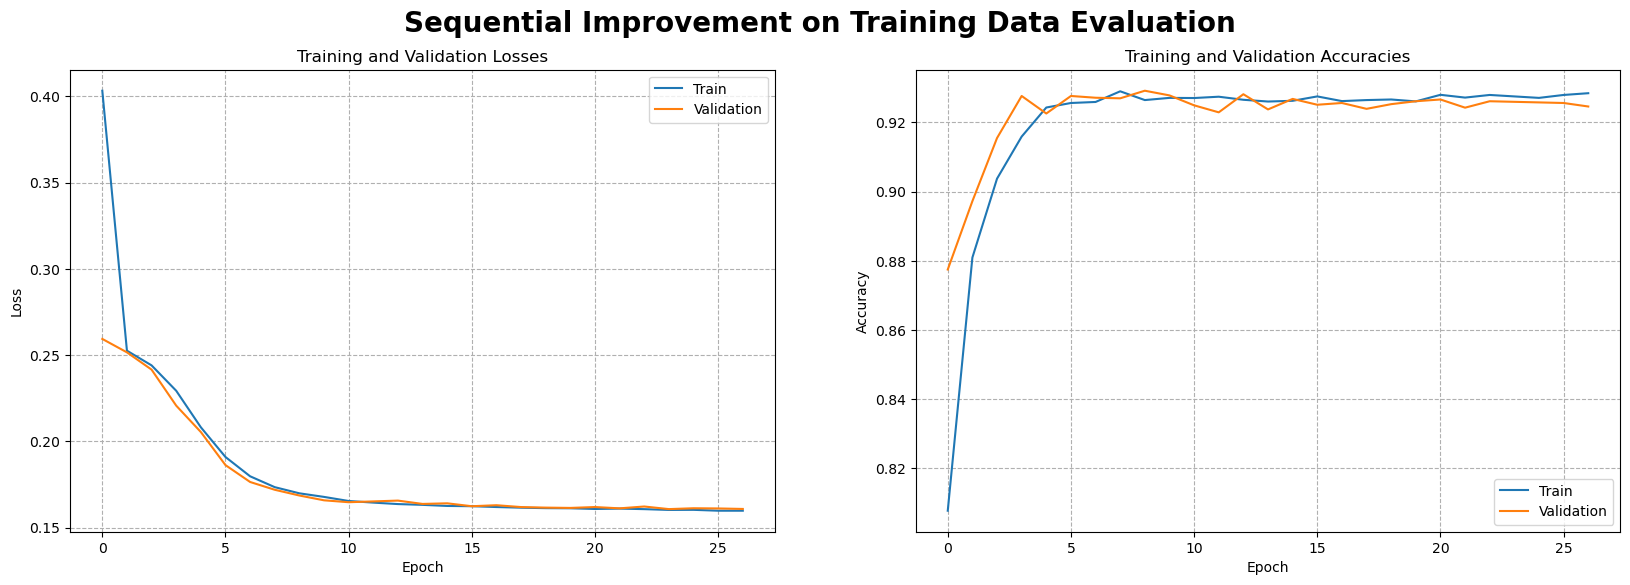

In [99]:
# Plot training & validation loss values
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Sequential Improvement on Training Data Evaluation', fontsize=20, weight='bold')

plt.subplot(1, 2, 1)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_sequen_imp.history['loss'])
plt.plot(history_sequen_imp.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(linestyle='--')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.title("Training and Validation Accuracies", fontsize=12)
plt.plot(history_sequen_imp.history['accuracy'])
plt.plot(history_sequen_imp.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(linestyle='--')

plt.show()

In [100]:
test_loss, test_acc = sequen_imp.evaluate(test_ds)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

 19/232 [=>............................] - ETA: 0s - loss: 0.1857 - accuracy: 0.9062

232/232 [==============================] - 1s 3ms/step - loss: 0.1673 - accuracy: 0.9232
Test loss: 0.1673
Test accuracy: 0.9232


In [101]:
# Model Evaluation of test-set

y_pred_func_imp = sequen_imp.predict(train_ds)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_func_imp))

  1/740 [..............................] - ETA: 1:49

740/740 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.46      0.44      0.45     10864
           1       0.54      0.56      0.55     12804

    accuracy                           0.51     23668
   macro avg       0.50      0.50      0.50     23668
weighted avg       0.51      0.51      0.51     23668



 21/232 [=>............................] - ETA: 0s

232/232 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3395
           1       0.92      0.94      0.93      4002

    accuracy                           0.92      7397
   macro avg       0.92      0.92      0.92      7397
weighted avg       0.92      0.92      0.92      7397



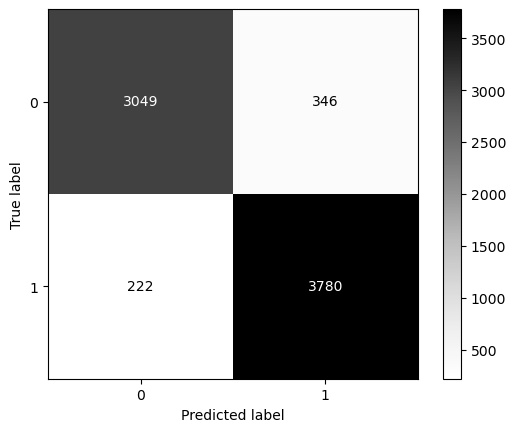

In [102]:
# Model Evaluation of test-set

y_pred_seq_imp = sequen_imp.predict(test_ds)
y_pred_seq_imp = np.where(y_pred_seq_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_imp))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_seq_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()
     

Setelah dilakukan improvement pada model Sequential API didapatkan accuracy train sebesar 51% sedangkan untuk data test sebesar 92%. Sehingga dalam model Sequential API didapatkan bahwa model tersebut termasuk kedalam underfit.

## **``Functional Improvement``**

In [103]:
# Create Functional Model

input_layer_imp = Input(x_train_tran.shape[1],)
hidden_layer1_imp = Dense(50, activation='relu')(input_layer_imp)
hidden_layer2_imp = Dense(50, activation='relu')(hidden_layer1_imp)
hidden_layer3_imp = Dense(3, activation='relu')(hidden_layer2_imp)


concat_layer_imp = tf.keras.layers.concatenate([input_layer_imp, hidden_layer3_imp])
output_layer_imp = Dense(1, activation='sigmoid')(concat_layer_imp)

func_imp = Model(inputs=input_layer_imp, outputs=output_layer_imp)

# Compile
func_imp.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

In [104]:
func_imp.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 26)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 50)           1350        ['input_1[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 50)           2550        ['dense_6[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 3)            153         ['dense_7[0][0]']                
                                                                                            

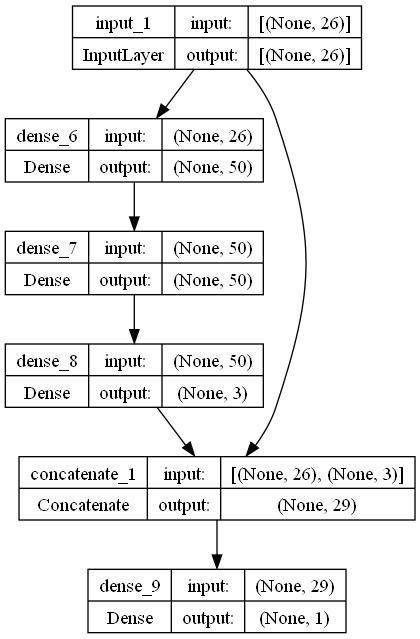

In [105]:
tf.keras.utils.plot_model(func_imp, show_shapes=True)

In [106]:
# Train the Model
history_func_imp = func_imp.fit(train_ds,
                                   epochs=100,
                                   validation_data= (valid_ds),
                                   batch_size=32,
                                   callbacks= callbacks2
                                   )

Epoch 1/100


740/740 [==============================] - 5s 5ms/step - loss: 0.4416 - accuracy: 0.7688 - val_loss: 0.3064 - val_accuracy: 0.8912
Epoch 2/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2563 - accuracy: 0.9127 - val_loss: 0.2195 - val_accuracy: 0.9277
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2071 - accuracy: 0.9231 - val_loss: 0.2025 - val_accuracy: 0.9241
Epoch 4/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1925 - accuracy: 0.9273 - val_loss: 0.1892 - val_accuracy: 0.9285
Epoch 5/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1861 - accuracy: 0.9273 - val_loss: 0.1845 - val_accuracy: 0.9282
Epoch 6/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1817 - accuracy: 0.9267 - val_loss: 0.1818 - val_accuracy: 0.9260
Epoch 7/100
740/740 [==============================] - 3s 4ms/step - loss: 0.1775 - accuracy: 0.9277 - val_loss: 0.1924 - val_accuracy: 0.9229
Epoch 8/100

In [107]:
model_func_imp_df = pd.DataFrame(history_func_imp.history)
model_func_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.441577,0.768759,0.306391,0.891161
1,0.256277,0.912667,0.219527,0.927666
2,0.207132,0.923145,0.202546,0.924117
3,0.192514,0.927328,0.189240,0.928511
4,0.186085,0.927286,0.184515,0.928173
5,0.181743,0.926652,0.181829,0.925976
6,0.177455,0.927708,0.192389,0.922934
7,0.175735,0.929652,0.180987,0.925469
8,0.172004,0.930750,0.176151,0.928173
9,0.170445,0.930370,0.173350,0.928173


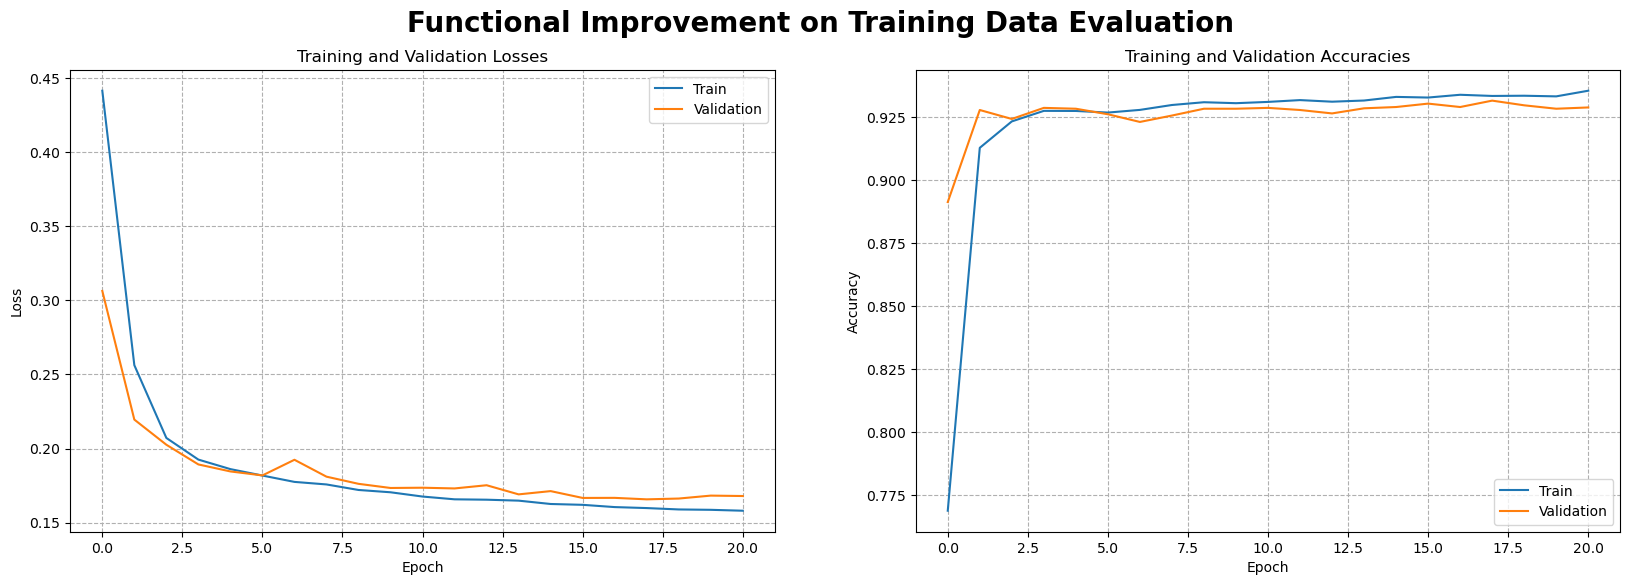

In [108]:
# Plot training & validation loss values
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Functional Improvement on Training Data Evaluation', fontsize=20, weight='bold')

plt.subplot(1, 2, 1)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_func_imp.history['loss'])
plt.plot(history_func_imp.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(linestyle='--')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.title("Training and Validation Accuracies", fontsize=12)
plt.plot(history_func_imp.history['accuracy'])
plt.plot(history_func_imp.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(linestyle='--')

plt.show()

In [109]:
test_loss, test_acc = func_imp.evaluate(test_ds)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

 21/232 [=>............................] - ETA: 0s - loss: 0.1916 - accuracy: 0.9211

232/232 [==============================] - 1s 3ms/step - loss: 0.1750 - accuracy: 0.9265
Test loss: 0.1750
Test accuracy: 0.9265


In [110]:
# Model Evaluation of test-set

y_pred_func_imp = func_imp.predict(train_ds)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_func_imp))


740/740 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0       0.46      0.46      0.46     10864
           1       0.54      0.54      0.54     12804

    accuracy                           0.50     23668
   macro avg       0.50      0.50      0.50     23668
weighted avg       0.50      0.50      0.50     23668



 20/232 [=>............................] - ETA: 0s

232/232 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3395
           1       0.93      0.93      0.93      4002

    accuracy                           0.93      7397
   macro avg       0.93      0.93      0.93      7397
weighted avg       0.93      0.93      0.93      7397



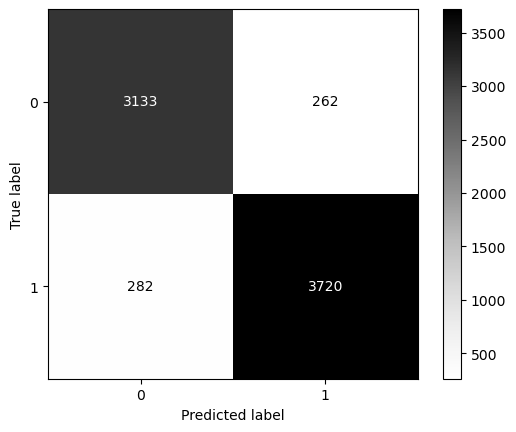

In [111]:
# Model Evaluation of test-set

y_pred_func_imp = func_imp.predict(test_ds)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_imp))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_func_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Setelah dilakukan improvement pada model Functional API didapatkan accuracy train sebesar 50% sedangkan untuk data test sebesar 93%. Sehingga dalam model Sequential API didapatkan bahwa model tersebut termasuk kedalam underfit.

# Save Model

In [112]:
# save preprocessor pipeline
with open('preprocessor.pkl','wb') as file_1:
    joblib.dump(preprocessor,file_1)

In [113]:
# Save ANN Model
sequen_imp.save('seq_imp_model.h5')

# Conclusion

Berdasarkan Exploratory Data Analysis :

> - Lebih dari 50% nasabah di cap sebagai churn, akan tetapi secara keseluruhan label targetnya cukup balance sehingga tidak perlu dilakukan handling class imbalance.
> - Perbandingan nasabah customer antara female dan male hanya berbeda sedikit. Dimana female yang not churn sebanyak 8441, dan yang churn sebanyak 10049. Sedangkan male yang not churn sebanyak 8509, dan yang churn sebanyak 9934. Dari grafik tersebut dapat dilihat baik nasabah female atau male kebanyakan mengalami churn.
> - Kebanyakan nasabah yang meninggalkan perusahaan (churn) memiliki kategori member yang rendah sehingga dapat disimpulkan bahwa semakin tinggi member maka nasabah tidak akan meninggalkan perusahaan (not churn) karena pelanggan mempercayai perusahaan. Dapat dilihat pada 2 kategori tertinggi yaitu premium membership dan platinum membership.
> - Kebanyakan nasabah yang meninggalkan perusahaan adalah nasabah yang memiliki feedback negatif, diantaranya Poor Website, Poor Customer Service, Too many ads, Poor Product Quality, No reason specified feedback. Sedangkan nasabah yang memberikan feedback positif seperti Product always in stock, Reasonable Price, Quality Customer Care, User Firendly Website tidak ada yang meninggalkan perusahaan atau tetap menjadi nasabah.


Dalam konteks pengembangan model neural networks, terdapat dua pendekatan utama untuk membangun arsitektur model: Sequential dan Functional.

> Sequential Model:
> - Kelebihan: Mudah digunakan dan lebih sederhana dalam implementasinya, cocok untuk model yang memiliki arsitektur yang sederhana dan berurutan, tidak memerlukan banyak manipulasi saat membuat model linear.
> - Kekurangan: Tidak fleksibel untuk membangun model dengan banyak input dan output atau model dengan cabang-cabang (multiple inputs/outputs atau model dengan multiple branches), sulit untuk berbagi lapisan (layer) antara beberapa cabang dari model.

> Functional Model: 
> - Kelebihan: Lebih fleksibel untuk membangun model dengan banyak input dan output atau model dengan cabang-cabang, memungkinkan untuk berbagi lapisan (layer) antara beberapa cabang dari model, cocok untuk arsitektur model yang kompleks dan non-linear.
> - Kekurangan: Memerlukan sedikit lebih banyak kode daripada Sequential model karena harus mendefinisikan koneksi antar lapisan secara eksplisit, mungkin terasa lebih rumit bagi pengguna yang baru mengenal atau baru memulai dengan jaringan saraf.


Dari hasil Sequential dan Functional didapatkan bahwa kedua model tersebut termasuk ke dalam kategori underfit karena accuracy data test lebih baik daripada data train.